# Lecture 5_8: Birth-Death Models

In [156]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random as rand

## Example 5.18: The Yule Model

**1. Simulate the Yule process with $\lambda=1$ for $T=1.5$ units of time. Sketch the corresponding tree.**

In [158]:
def SimYule(lam,tMax):
    #initialization
    t=0;
    C=np.array([[0]]);
    n=C.shape[0]
    rateTot=lam*n
    Deltat=np.random.exponential(scale=1/rateTot);
    t=t+Deltat
    while t<tMax:
        C=C+np.identity(n)*Deltat #Update time
        par=rand.random_integer = random.randint(0, n - 1) #Choose parent
        C=np.vstack([C, C[par]]) # Add parental row
        C=np.hstack([C,C[:,par].reshape(-1, 1)]) # Add parental column
        n=C.shape[0] # Update n
        rateTot=lam*n # Calculate new rate
        Deltat=np.random.exponential(scale=1/rateTot); # Choose next branching time
        t=t+Deltat 
    C=C+np.identity(n)*Deltat #Add terminal branches
    return C

In [161]:
test=SimYule(1,1.5)

In [162]:
np.round(test,2)

array([[1.61, 0.17, 0.45, 0.77, 0.77],
       [0.17, 1.61, 0.17, 0.17, 0.17],
       [0.45, 0.17, 1.61, 0.45, 0.45],
       [0.77, 0.17, 0.45, 1.61, 1.44],
       [0.77, 0.17, 0.45, 1.44, 1.61]])

The matrix generated above is random, but for one example:

$$\mathbf{C}=\begin{bmatrix}
2.8 & 0.7 & 0.7 \\
0.7 & 2.8 & 0.9 \\
0.7 & 0.9 & 2.8 \\
\end{bmatrix}$$

The first branching event occurs after 0.7 units of time between lineages A and B. Then there is a branching event between lineages 2 and 3 at time 0.9 (so 0.2 units of time after the first).  Finally the terminal branches last until time 2.8


**2. Draw the "Lineage Through Time" plot for your simulation**

Again let's use one specific example of the matrix:

$$
\mathbf{C}=
\begin{bmatrix}
1.53 & 0.22 & 0.22 & 0.92 & 0.22 & 0.92 & 0.22 \\
0.22 & 1.53 & 0.78 & 0.22 & 0.96 & 0.22 & 0.78 \\
0.22 & 0.78 & 1.53 & 0.22 & 0.78 & 0.22 & 1.16 \\
0.92 & 0.22 & 0.22 & 1.53 & 0.22 & 1.08 & 0.22 \\
0.22 & 0.96 & 0.78 & 0.22 & 1.53 & 0.22 & 0.78 \\
0.92 & 0.22 & 0.22 & 1.08 & 0.22 & 1.53 & 0.22 \\
0.22 & 0.78 & 1.16 & 0.22 & 0.78 & 0.22 & 1.53 \\
\end{bmatrix}
$$

The lineage through time plot, captures the number of lineages present in the tree at time $t$, one way to ask is how many branching events have occurred before time $t$.   We can extract the branching events by looking at the unique upper-triangle elements of $\mathbf{C}$.

In [145]:
Cex=np.array([[1.53, 0.22, 0.22, 0.92, 0.22, 0.92, 0.22],
       [0.22, 1.53, 0.78, 0.22, 0.96, 0.22, 0.78],
       [0.22, 0.78, 1.53, 0.22, 0.78, 0.22, 1.16],
       [0.92, 0.22, 0.22, 1.53, 0.22, 1.08, 0.22],
       [0.22, 0.96, 0.78, 0.22, 1.53, 0.22, 0.78],
       [0.92, 0.22, 0.22, 1.08, 0.22, 1.53, 0.22],
       [0.22, 0.78, 1.16, 0.22, 0.78, 0.22, 1.53]])
# Extract unique upper triangle elements
branchingTimes = np.triu(Cex, k=1).flatten()

# Get unique elements
branchingTimes = np.sort(np.unique(branchingTimes))
print(branchingTimes)
y_vec=np.arange(branchingTimes.size);

[0.   0.22 0.78 0.92 0.96 1.08 1.16]


Text(0, 0.5, 'Number of Lineages')

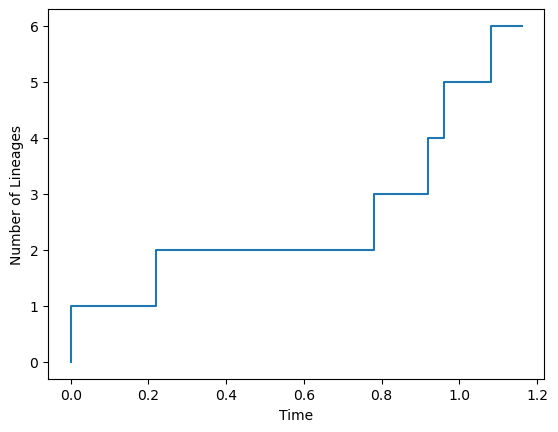

In [147]:
plt.step(branchingTimes,y_vec)
plt.xlabel('Time')
plt.ylabel('Number of Lineages')

## Example 5.19: Birth Death Model

**1. Simulate the Birth Death process with $\lambda=1.5$ $\mu=0.5$ for $T=1.5$ units of time. Sketch the corresponding tree.**

We can simulate the process in two ways, in the first method we don't keep track of extinct lineages.

In [187]:
def SimBD1(lam,mu,tMax):
    #initialization
    t=0;
    C=np.array([[0]]);
    n=C.shape[0]
    rateTot=(lam+mu)*n
    Deltat=np.random.exponential(scale=1/rateTot);
    t=t+Deltat
    while t<tMax and n>0:
        C=C+np.identity(n)*Deltat #Update time
        par=rand.random_integer = random.randint(0, n - 1) #Choose parent/ind to die
        if rand.random()<lam*n/rateTot: #Birth event
            C=np.vstack([C, C[par]]) # Add parental row
            C=np.hstack([C,C[:,par].reshape(-1, 1)]) # Add parental column
        else: 
            C=np.delete(C, par, axis=0)
            C=np.delete(C, par, axis=1)
        n=C.shape[0] # Update n
        rateTot=(lam+mu)*n # Calculate new rate
        Deltat=np.random.exponential(scale=1/rateTot); # Choose next branching time
        t=t+Deltat 
    C=C+np.identity(n)*Deltat #Add terminal branches
    return C

In [190]:
test=SimBD1(1.5,0.5,1.5)

In [191]:
test

array([[1.62038768, 0.15374953, 1.10176968, 1.10176968],
       [0.15374953, 1.62038768, 0.15374953, 0.15374953],
       [1.10176968, 0.15374953, 1.62038768, 1.16546245],
       [1.10176968, 0.15374953, 1.16546245, 1.62038768]])

In [284]:
def SimBD2(lam,mu,tMax):
    #initialization
    t=0;
    C=np.array([[0]]);
    V=[1];# vector of lineages 1: extant, 0: extinct
    pos=[index for index, value in enumerate(V) if value == 1]
    n=np.size(pos)
    rateTot=(lam+mu)*n
    Deltat=np.random.exponential(scale=1/rateTot);
    t=t+Deltat
    while t<tMax and n>0:
        C=C+np.diag(V)*Deltat #Update time
        par=np.random.choice(pos) #Choose parent/ind to die
        if rand.random()<lam*n/rateTot: #Birth event
            C=np.vstack([C, C[par]]) # Add parental row
            C=np.hstack([C,C[:,par].reshape(-1, 1)]) # Add parental column
            V=np.append(V, 1)
        else: 
            V[par]=0;
        pos=[index for index, value in enumerate(V) if value == 1]
        n=np.size(pos)
        rateTot=(lam+mu)*n # Calculate new rate
        if n>0:
            Deltat=np.random.exponential(scale=1/rateTot); # Choose next branching time
        else:
            Deltat=tMax-t
        t=t+Deltat
    C=C+np.diag(V)*Deltat #Update time
    return C

In [289]:
test=SimBD2(1,0.5,1.5)

In [290]:
test

array([[1.65311033, 0.75840448, 0.75840448],
       [0.75840448, 1.0737496 , 1.05119876],
       [0.75840448, 1.05119876, 1.65311033]])